In [1]:
import pandas as pd
from sqlalchemy import create_engine


In [2]:
engine = create_engine(
    'mssql+pyodbc://'
    '@./AdventureWorks2019?'  # username:pwd@server:port/database
    'driver=ODBC+Driver+17+for+SQL+Server'
)
type(engine)


sqlalchemy.engine.base.Engine

In [3]:
df = pd.read_sql(
    'SELECT [CustomerID]\
        ,[PersonID]\
        ,[StoreID]\
        ,[TerritoryID]\
        ,[AccountNumber]\
        ,[ModifiedDate]\
    FROM [Sales].[Customer]',
    engine,
    index_col='CustomerID')

df

,PersonID,StoreID,TerritoryID,AccountNumber,ModifiedDate
CustomerID,,,,,
1,NaN,934.0,1,AW00000001,2014-09-12 11:15:07.263
2,NaN,1028.0,1,AW00000002,2014-09-12 11:15:07.263
3,NaN,642.0,4,AW00000003,2014-09-12 11:15:07.263
4,NaN,932.0,4,AW00000004,2014-09-12 11:15:07.263
5,NaN,1026.0,4,AW00000005,2014-09-12 11:15:07.263
...,...,...,...,...,...
30114,1985.0,1986.0,7,AW00030114,2014-09-12 11:15:07.263
30115,1987.0,1988.0,6,AW00030115,2014-09-12 11:15:07.263
30116,1989.0,1990.0,4,AW00030116,2014-09-12 11:15:07.263


In [5]:
start_date = '2012-01-01'
end_date = '2012-12-31'
product_name = '%shorts%'

df2 = pd.read_sql('SELECT AVG(sod.OrderQty) [Avg Order Qty],\
                p.Name,\
                FORMAT(soh.OrderDate,\'yyyy-MM\') [Year-Month]\
        FROM Sales.SalesOrderHeader soh\
        JOIN Sales.SalesOrderDetail sod ON sod.SalesOrderID = soh.SalesOrderID\
        JOIN Production.Product p ON sod.ProductID = p.ProductID\
        WHERE soh.OrderDate >= ?\
          AND soh.OrderDate <= ? \
          AND p.Name LIKE ?\
        GROUP BY p.Name, FORMAT(soh.OrderDate,\'yyyy-MM\') \
        ORDER BY FORMAT(soh.OrderDate,\'yyyy-MM\') DESC',
        engine, 
        params=[start_date, end_date,product_name])

df2.head()

,Avg Order Qty,Name,Year-Month
0,2,"Men's Bib-Shorts, L",2012-12
1,3,"Men's Bib-Shorts, M",2012-12
2,3,"Men's Bib-Shorts, S",2012-12
3,1,"Men's Sports Shorts, L",2012-12
4,3,"Men's Sports Shorts, M",2012-12


In [6]:
df_piv = df2.pivot(index=['Year-Month'], 
                    columns=['Name'], 
                    values=['Avg Order Qty'])
df_piv.head()

Avg Order Qty                                          \
Name       Men's Bib-Shorts, L Men's Bib-Shorts, M Men's Bib-Shorts, S   
Year-Month                                                               
2012-05                      3                   5                   4   
2012-06                      3                   4                   4   
2012-07                      3                   5                   4   
2012-08                      3                   4                   4   
2012-09                      3                   4                   2   

                                                          \
Name       Men's Sports Shorts, L Men's Sports Shorts, M   
Year-Month                                                 
2012-05                         3                      5   
2012-06                         3                      4   
2012-07                         5                      5   
2012-08                         3                      4   
2012-09                         3                      3   

                                   
Name       Men's Sports Shorts, S  
Year-Month                         
2012-05                         3  
2012-06                         3  
2012-07                         4  
2012-08                         3  
2012-09                         4

[Text(0, 0, '2012-05'),
 Text(1, 0, '2012-06'),
 Text(2, 0, '2012-07'),
 Text(3, 0, '2012-08'),
 Text(4, 0, '2012-09'),
 Text(5, 0, '2012-10'),
 Text(6, 0, '2012-11'),
 Text(7, 0, '2012-12')]

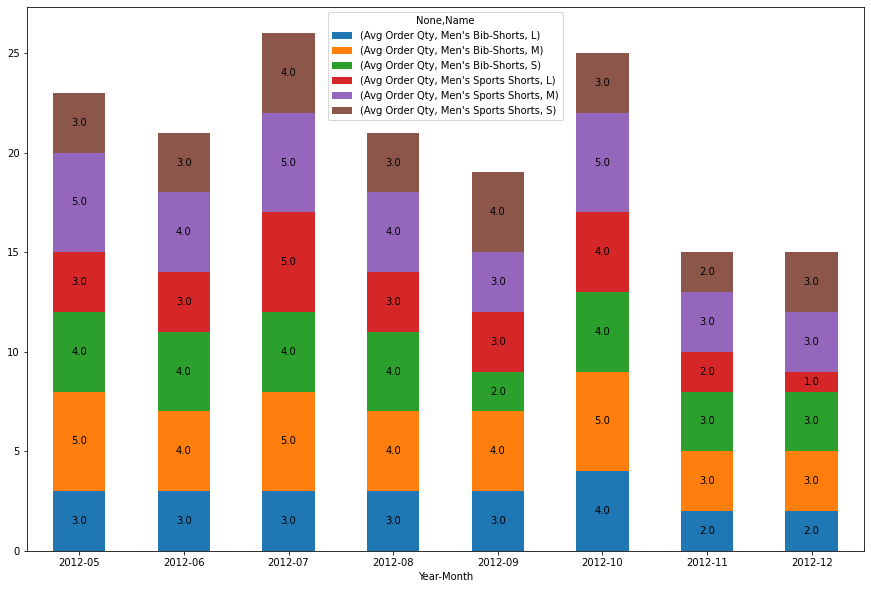

In [8]:
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = (15,10)

ax = df_piv.plot(stacked=True, kind='bar')

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    
# Set Tick labels
ax.set_xticklabels(df_piv.index,rotation='horizontal')
